In [24]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [17]:
!pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 9.1 MB/s eta 0:00:00


In [4]:
!pip install pandas

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors, rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from xgboost import XGBRegressor
import joblib
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

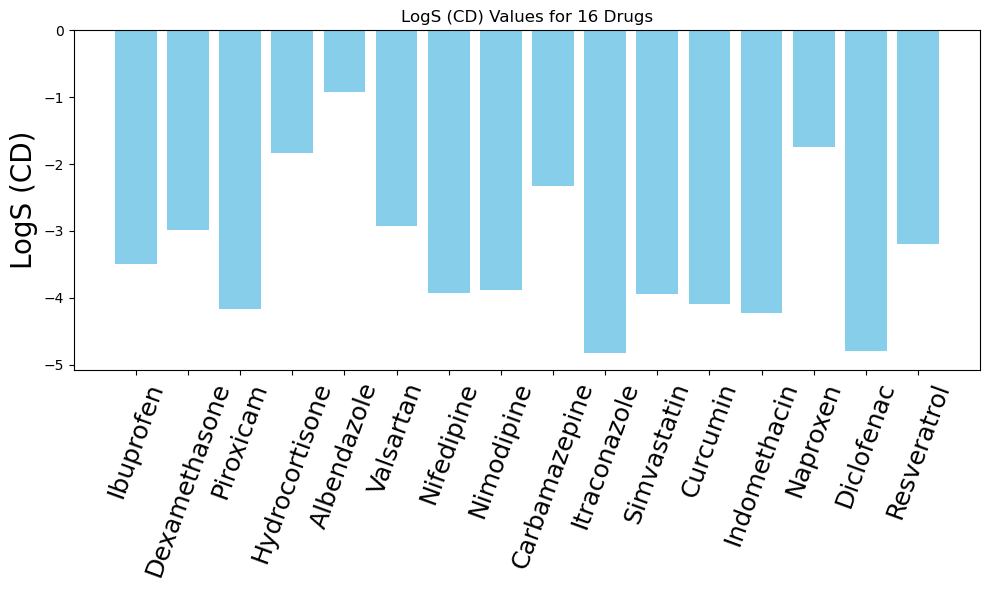

In [7]:
import matplotlib.pyplot as plt

# Data from your spreadsheet (LogS (CD) values)
drugs = [
    "Ibuprofen", "Dexamethasone", "Piroxicam", "Hydrocortisone", 
    "Albendazole", "Valsartan", "Nifedipine", "Nimodipine",
    "Carbamazepine", "Itraconazole", "Simvastatin", "Curcumin",
    "Indomethacin", "Naproxen", "Diclofenac", "Resveratrol"
]

logS_cd = [
    -3.5, -2.98, -4.17, -1.83,
    -0.92, -2.92, -3.92, -3.88,
    -2.33, -4.83, -3.94, -4.09,
    -4.23, -1.75, -4.8, -3.2
]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(drugs, logS_cd, color="skyblue")

# Improve the x-axis labels (rotate for readability)
plt.xticks(rotation=70, fontsize=18)
plt.ylabel("LogS (CD)", fontsize=20)
plt.title("LogS (CD) Values for 16 Drugs")

plt.tight_layout()
plt.show()


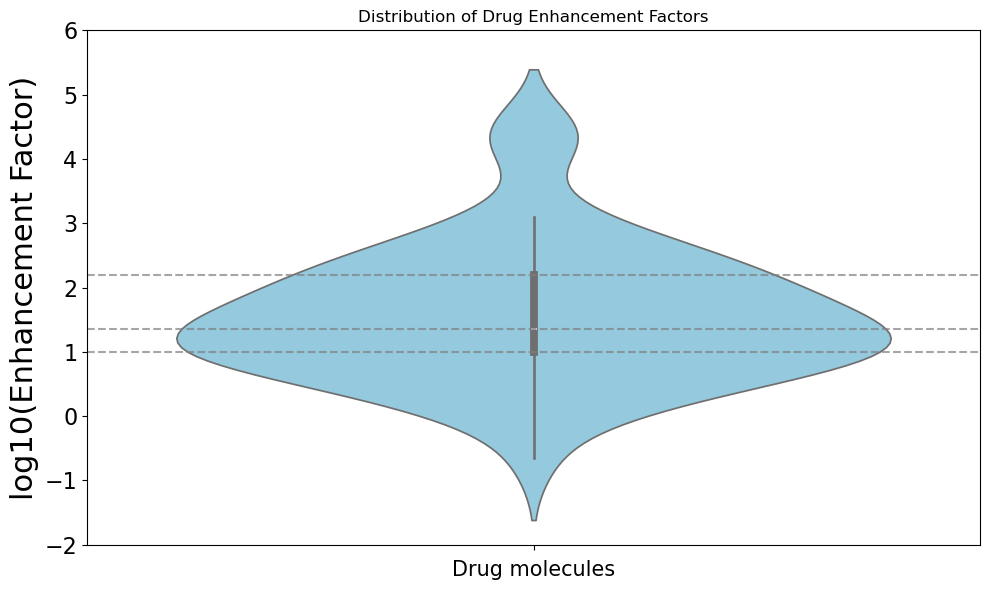

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read data from CSV file
# Note: Assuming your CSV file matches the image shown
# If column indexes are different in the actual file, adjust accordingly
file_path = 'C:/Users/gagno/Downloads/molecule_dataset.csv'
df = pd.read_csv(file_path)  # Replace with your actual CSV file name

# Assuming 'Enhancement Factor' is in column L (index 11 if 0-indexed)
# Check if that's the correct column name, if not, use the actual column name
if 'Enhancement Factor' in df.columns:
    enhancement_col = 'Enhancement Factor'
else:
    # If column name doesn't match exactly, you can use column index
    # This gets the 12th column (index 11) which should be Enhancement Factor
    enhancement_col = df.columns[11]

# Calculate log10 of Enhancement Factor
df['log_Enhancement_Factor'] = np.log10(df[enhancement_col])

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(y=df['log_Enhancement_Factor'], color='skyblue')
plt.title('Distribution of Drug Enhancement Factors')
plt.ylabel('log10(Enhancement Factor)', fontsize=22)
plt.xlabel('Drug molecules', fontsize=15)

plt.yticks(fontsize=16)

# Add horizontal dotted lines at quartiles
q1, q2, q3 = np.percentile(df['log_Enhancement_Factor'].dropna(), [25, 50, 75])
plt.axhline(y=q1, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=q2, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=q3, color='gray', linestyle='--', alpha=0.7)

# Set y-axis limits similar to the example
plt.ylim(-2, 6)

plt.tight_layout()
plt.show()



C:\Users\gagno\AppData\Local\Temp\ipykernel_4804\2515022059.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([''])
C:\Users\gagno\AppData\Local\Temp\ipykernel_4804\2515022059.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([''])


<Figure size 1000x600 with 0 Axes>

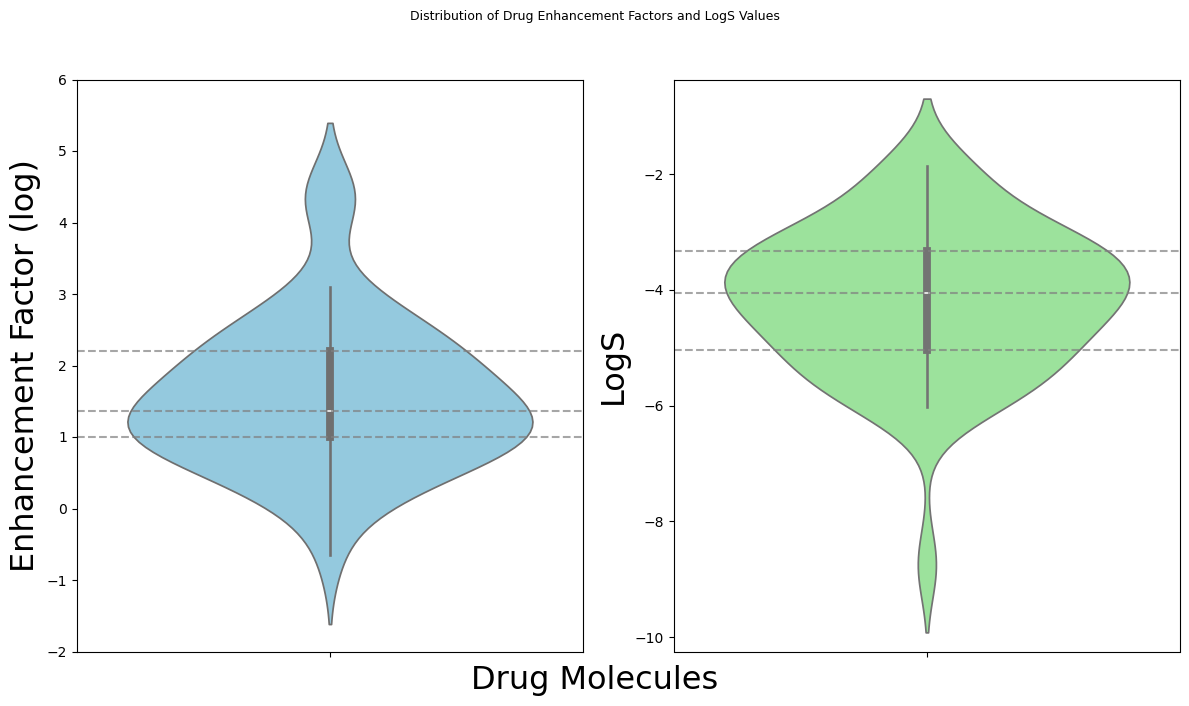

C:\Users\gagno\AppData\Local\Temp\ipykernel_4804\2515022059.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='variable', y='value', data=plot_data,


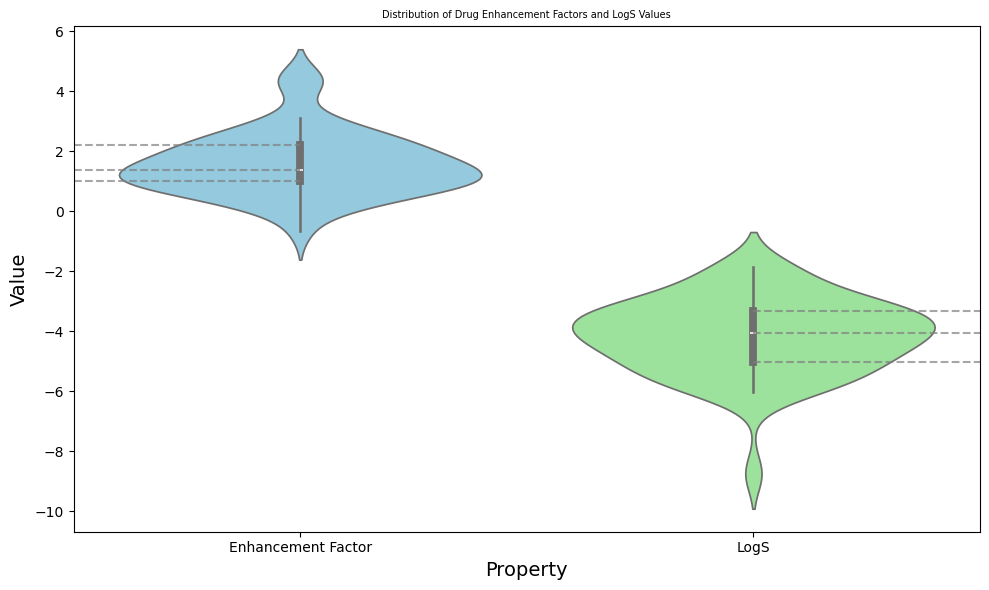

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

# Read data from CSV file
file_path = 'C:/Users/gagno/Downloads/molecule_dataset.csv'  # Update this path
df = pd.read_csv(file_path)

# Process Enhancement Factor
if 'Enhancement Factor' in df.columns:
    enhancement_col = 'Enhancement Factor'
else:
    enhancement_col = df.columns[11]  # Assuming column K is index 11 (0-indexed)

# Calculate log10 of Enhancement Factor (handling potential zeros/negatives)
df['log_Enhancement_Factor'] = df[enhancement_col].apply(lambda x: np.log10(max(x, 1e-10)) if x > 0 else np.nan)

# Process LogS column
if 'LogS' in df.columns:
    logs_col = 'LogS'
else:
    logs_col = df.columns[5]  # Column F should be index 5 (0-indexed)

# Clean data - remove any rows with NaN in relevant columns
clean_df = df.dropna(subset=['log_Enhancement_Factor', logs_col])

# Create figure with reasonable size
plt.figure(figsize=(10, 6))

# Create a figure with two subplots sharing the x-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=False)

# Plot left violin (Enhancement Factor)
sns.violinplot(ax=ax1, y=clean_df['log_Enhancement_Factor'], color='skyblue')
ax1.set_title('')
ax1.set_ylabel('Enhancement Factor (log)', fontsize=23)
ax1.set_xlabel('')
ax1.set_xticklabels([''])

# Add quartile lines for Enhancement Factor
q1, q2, q3 = np.percentile(clean_df['log_Enhancement_Factor'], [25, 50, 75])
ax1.axhline(y=q1, color='gray', linestyle='--', alpha=0.7)
ax1.axhline(y=q2, color='gray', linestyle='--', alpha=0.7)
ax1.axhline(y=q3, color='gray', linestyle='--', alpha=0.7)
ax1.set_ylim(-2, 6)

# Plot right violin (LogS)
sns.violinplot(ax=ax2, y=clean_df[logs_col], color='lightgreen')
ax2.set_title('')
ax2.set_ylabel('LogS', fontsize=23)
ax2.set_xlabel('')
ax2.set_xticklabels([''])

# Add quartile lines for LogS
q1_s, q2_s, q3_s = np.percentile(clean_df[logs_col], [25, 50, 75])
ax2.axhline(y=q1_s, color='gray', linestyle='--', alpha=0.7)
ax2.axhline(y=q2_s, color='gray', linestyle='--', alpha=0.7)
ax2.axhline(y=q3_s, color='gray', linestyle='--', alpha=0.7)

# Set a reasonable y limit for LogS
ax2.set_ylim(min(clean_df[logs_col]) - 1.5, max(clean_df[logs_col]) + 1.5)

# Add overall title
fig.suptitle('Distribution of Drug Enhancement Factors and LogS Values', fontsize=9)
fig.text(0.5, 0.01, 'Drug Molecules', ha='center', fontsize=23)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Alternative approach using a split violin plot on a single axis
# This is a simpler approach that avoids the complex custom split violin function
plt.figure(figsize=(10, 6))

# Create a new dataframe in the format needed for a grouped violin plot
plot_data = pd.DataFrame({
    'value': pd.concat([clean_df['log_Enhancement_Factor'], clean_df[logs_col]]),
    'variable': ['Enhancement Factor'] * len(clean_df) + ['LogS'] * len(clean_df)
})

# Create the split violin plot
ax = sns.violinplot(x='variable', y='value', data=plot_data, 
                   palette={'Enhancement Factor': 'skyblue', 'LogS': 'lightgreen'})

# Add title and labels
plt.title('Distribution of Drug Enhancement Factors and LogS Values', fontsize=7)
plt.xlabel('Property', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Add quartile lines for Enhancement Factor
enhancement_data = plot_data[plot_data['variable'] == 'Enhancement Factor']['value']
q1, q2, q3 = np.percentile(enhancement_data, [25, 50, 75])
plt.axhline(y=q1, color='gray', linestyle='--', alpha=0.7, xmin=0, xmax=0.25)
plt.axhline(y=q2, color='gray', linestyle='--', alpha=0.7, xmin=0, xmax=0.25)
plt.axhline(y=q3, color='gray', linestyle='--', alpha=0.7, xmin=0, xmax=0.25)

# Add quartile lines for LogS
logs_data = plot_data[plot_data['variable'] == 'LogS']['value']
q1_s, q2_s, q3_s = np.percentile(logs_data, [25, 50, 75])
plt.axhline(y=q1_s, color='gray', linestyle='--', alpha=0.7, xmin=0.75, xmax=1)
plt.axhline(y=q2_s, color='gray', linestyle='--', alpha=0.7, xmin=0.75, xmax=1)
plt.axhline(y=q3_s, color='gray', linestyle='--', alpha=0.7, xmin=0.75, xmax=1)

plt.tight_layout()
plt.show()

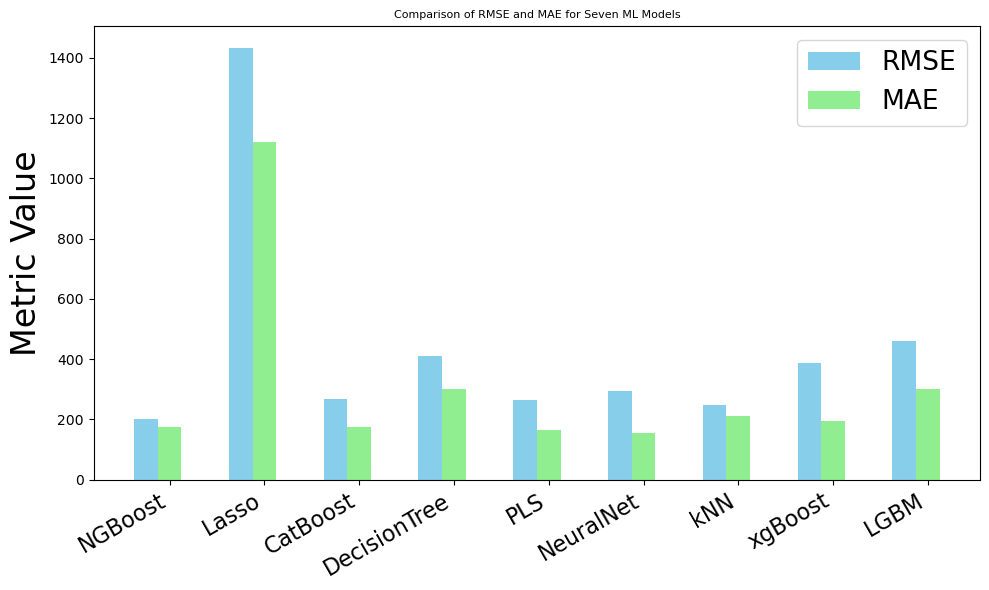

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Define your data
models = [
    "NGBoost", "Lasso", "CatBoost", 
    "DecisionTree", "PLS", "NeuralNet", "kNN", "xgBoost", "LGBM"
]

rmse = [
    201.7842,   # NGBoost
    1433.1909,  # Lasso
    267.5994,   # CatBoost
    410.2513,   # Decision Tree
    265.6855,   # PLS
    294.8775,   # Neural Network
    248.7568,    # kNN
    388.7923,    # XGBoost
    459.9882    #LGBM
]

mae = [
    175.4054,   # NGBoost
    1121.9323,  # Lasso
    173.7711,   # CatBoost
    302.7208,   # Decision Tree
    165.0338,   # PLS
    155.5298,   # Neural Network
    211.7938,    # kNN
    195.5190,    # XGBoost
    299.9526,    # LGBM
]


# 2) Create a grouped bar chart
x = np.arange(len(models))  # positions for each model
width = 0.25                # width of each bar

plt.figure(figsize=(10, 6))

# Bar for RMSE (shift left)
plt.bar(x - width, rmse, width, label='RMSE', color='skyblue')

# Bar for MAE (center)
plt.bar(x,        mae,  width, label='MAE',  color='lightgreen')


# 3) Formatting
plt.xticks(x, models, rotation=30, ha='right', fontsize=16)
plt.ylabel('Metric Value', fontsize=24)
plt.title('Comparison of RMSE and MAE for Seven ML Models', fontsize=8)
plt.legend(fontsize=19)

plt.tight_layout()
plt.show()


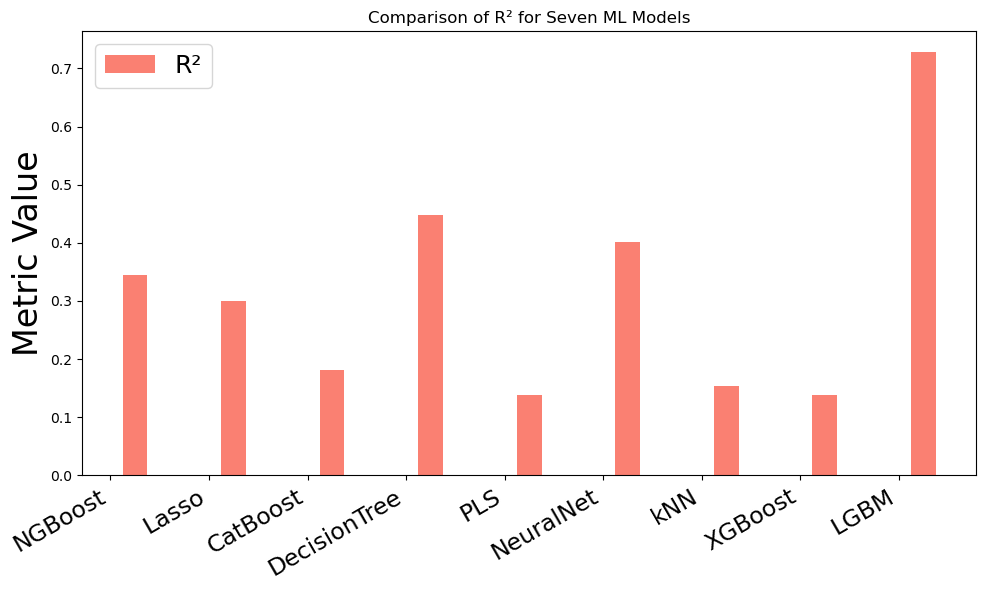

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Define your data
models = [
    "NGBoost", "Lasso", "CatBoost", 
    "DecisionTree", "PLS", "NeuralNet", "kNN", "XGBoost", 'LGBM'
]


r2 = [
    0.3439,     # NGBoost
    0.2994,   # Lasso
    0.1807,    # CatBoost
    0.4479,    # Decision Tree
    0.1375,    # PLS
    0.4012,    # Neural Network
    0.1533,      # kNN
    0.1383,     #XGBoost
    0.7274     #LGBM
]

# 2) Create a grouped bar chart
x = np.arange(len(models))  # positions for each model
width = 0.25                # width of each bar

plt.figure(figsize=(10, 6))

# Bar for R^2 (shift right)
plt.bar(x + width, r2,  width, label='R²',   color='salmon')

# 3) Formatting
plt.xticks(x, models, rotation=30, ha='right', fontsize=17)
plt.ylabel('Metric Value', fontsize=24)
plt.title('Comparison of R² for Seven ML Models')
plt.legend(fontsize=18)

plt.tight_layout()
plt.show()